# Titanic Survival Prediction

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/Titanic-Dataset.csv')
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [6]:
# Handling Missing Values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
import pandas as pd

# ------------------------
# 1. Handle Age (numerical)
# ------------------------
df['Age'].fillna(df['Age'].median(), inplace=True)

# ------------------------
# 2. Handle Cabin (categorical)
# ------------------------
# Keep only the first letter (deck) and mark missing as 'U' for unknown
df['Cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

# ------------------------
# 3. Handle Embarked (categorical)
# ------------------------
# Fill missing values with the most frequent port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# ------------------------
# Verify changes
# ------------------------
print(df[['Age', 'Cabin', 'Embarked']].isnull().sum())


Age         0
Cabin       0
Embarked    0
dtype: int64


C:\Windows\Temp\ipykernel_17212\1888838195.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Windows\Temp\ipykernel_17212\1888838195.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# Handling Duplicate Values
df.duplicated().sum()

np.int64(0)

In [10]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Copy dataset
df_encoded = df.copy()

# 1. Label encode 'Sex'
le = LabelEncoder()
df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])

# 2. One-hot encode 'Embarked' and 'Cabin'
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked', 'Cabin'], drop_first=True)

# 3. Optional: Extract Title from Name and one-hot encode
df_encoded['Title'] = df_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_encoded = pd.get_dummies(df_encoded, columns=['Title'], drop_first=True)

# 4. Drop original 'Name' and 'Ticket'
df_encoded.drop(['Name', 'Ticket'], axis=1, inplace=True)


# 5. Check the dataset
print(df_encoded.head())


<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
C:\Windows\Temp\ipykernel_17212\149210936.py:15: SyntaxWarning: invalid escape sequence '\.'
  df_encoded['Title'] = df_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  ...  Title_Major  Title_Master  Title_Miss  \
0       False        True  ...        False         False       False   
1       False       False  ...        False         False       False   
2       False        True  ...        False         False        True   
3       False        True  ...        False         False       False   
4       False        True  ...        False         False       False   

   Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0       False      False      True      False     False     

In [12]:
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Sex             891 non-null    int64  
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Fare            891 non-null    float64
 8   Embarked_Q      891 non-null    bool   
 9   Embarked_S      891 non-null    bool   
 10  Cabin_B         891 non-null    bool   
 11  Cabin_C         891 non-null    bool   
 12  Cabin_D         891 non-null    bool   
 13  Cabin_E         891 non-null    bool   
 14  Cabin_F         891 non-null    bool   
 15  Cabin_G         891 non-null    bool   
 16  Cabin_T         891 non-null    bool   
 17  Cabin_U         891 non-null    boo

In [13]:
# scaling :
from sklearn.preprocessing import StandardScaler

# Numerical columns to scale
num_cols = ['Age', 'Fare']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Verify scaling
print(df_encoded[num_cols].head())
df_encoded.head()

        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,1,-0.565736,1,0,-0.502445,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,0,0.663861,1,0,0.786845,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,0,-0.258337,0,0,-0.488854,False,True,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,0,0.433312,1,0,0.420730,False,True,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,1,0.433312,0,0,-0.486337,False,True,...,False,False,False,False,False,True,False,False,False,False


## Training Model

In [14]:
# Logistic, Random Forest
# Logistic Algorithm used :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# 1. Split data into X and 
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']
# 2. Train-test spli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Train Logistic Regressi
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# 4. Prediction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # for ROC AUC

print("Model Training completed")

Model Training completed


c:\conda\envs\mlprojectenv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[86 19]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       105
           1       0.76      0.80      0.78        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179

ROC AUC: 0.8844272844272845


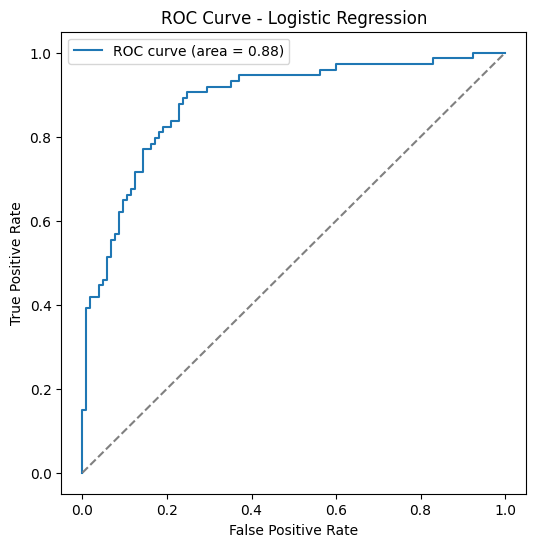

In [16]:

# 5. Evaluation Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)
# 6. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


Thanks

c:\conda\envs\mlprojectenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [02:14:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Random Forest Evaluation ---
Accuracy: 0.8435754189944135
ROC AUC: 0.8808236808236808
Confusion Matrix:
 [[92 13]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

--- XGBoost Evaluation ---
Accuracy: 0.8156424581005587
ROC AUC: 0.8638352638352638
Confusion Matrix:
 [[90 15]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



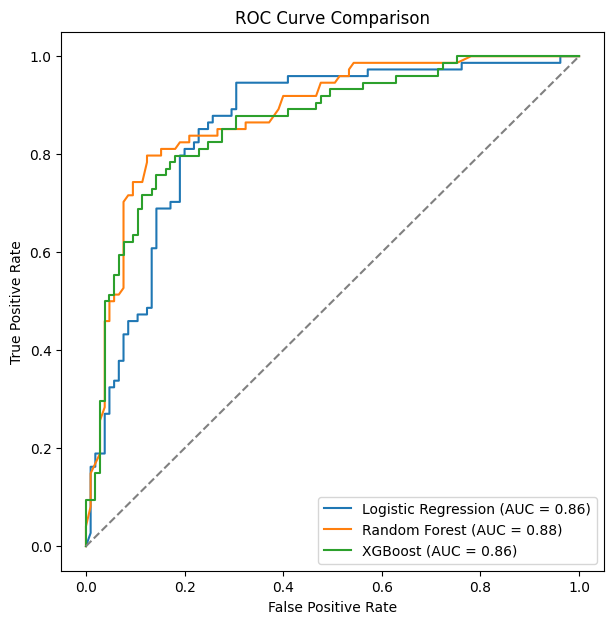

In [ ]:
# Random forest + XGBoost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

def evaluate_model(y_test, y_pred, y_proba, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.figure(figsize=(7,7))

y_proba_log = model.predict_proba(X_test)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_log):.2f})')

evaluate_model(y_test, y_pred_rf, y_proba_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, y_proba_xgb, 'XGBoost')

plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [ ]:
# So, if your ROC curve hugs the diagonal line, that actually means your model is poor, not accurate. You want it to bow upwards toward the top-left.